### oversampling

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
# Đọc dữ liệu sau tiền xử lý
path = r"/content/drive/MyDrive/project2/project2b/dantri_balanced.csv"
data = pd.read_csv(path, encoding="utf-8-sig")

# Xem kích thước và cột dữ liệu
print("Kích thước dữ liệu:", data.shape)
print("Các cột hiện có:", list(data.columns))
data.head(3)



# === B2. Xác định 2 lớp cần tăng cường ===
target_classes = ["Infographic", "Xã hội"]
target_n_samples = 200  # số mẫu mong muốn sau khi tăng cường

augmented_data = []

for cls in target_classes:
    df_minority = data[data["category"] == cls]
    print(f"→ {cls}: {len(df_minority)} mẫu ban đầu")

    # Nếu lớp có ít hơn mức mong muốn nhân bản ngẫu nhiên
    if len(df_minority) < target_n_samples:
        df_upsampled = resample(
            df_minority,
            replace=True,
            n_samples=target_n_samples,
            random_state=42
        )
        augmented_data.append(df_upsampled)
        print(f"  Đã tăng lên {target_n_samples} mẫu.")
    else:
        print(f"  Bỏ qua, vì đã đủ số lượng.")

# === B3. Gộp lại toàn bộ dữ liệu ===
data_balanced = pd.concat([data] + augmented_data, ignore_index=True)

# === B4. Kiểm tra lại phân bố ===
print("Số lượng mẫu sau khi tăng cường:")
print(data_balanced["category"].value_counts())

# === B5. Lưu file mới ===
output_path = "/content/drive/MyDrive/project2/project2b/dantri_balanced.csv"
data_balanced.to_csv(output_path, index=False, encoding="utf-8-sig")
print(f"Đã lưu dữ liệu tăng cường vào file: {output_path}")


→ Infographic: 98 mẫu ban đầu
  Đã tăng lên 200 mẫu.
→ Xã hội: 6 mẫu ban đầu
  Đã tăng lên 200 mẫu.
Số lượng mẫu sau khi tăng cường:
category
Thời sự                 661
Giáo dục                641
Giải trí                576
Sức khỏe                570
Thể thao                527
Kinh doanh              502
Du lịch                 480
Việc làm                480
Ô tô - Xe máy           439
Bạn đọc                 426
Pháp luật               413
Tình yêu - Giới tính    412
Thế giới                395
Infographic             298
Tâm điểm                253
Xã hội                  206
Văn hóa                 201
Nhịp sống trẻ           198
Name: count, dtype: int64
Đã lưu dữ liệu tăng cường vào file: /content/drive/MyDrive/project2/project2b/dantri_balanced.csv


In [ ]:
!pip install underthesea


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.4/978.4 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.0 MB/s eta 0:00:00


### EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu sau tiền xử lý
path = r"/content/drive/MyDrive/project2/project2b/dantri_balanced.csv"
data = pd.read_csv(path, encoding="utf-8-sig")

# Xem kích thước và cột dữ liệu
print("Kích thước dữ liệu:", data.shape)
print("Các cột hiện có:", list(data.columns))
data.head(3)


Kích thước dữ liệu: (7678, 4)
Các cột hiện có: ['category', 'content', 'clean_text', 'text_length']


category                                            content  \
0  Thời sự  Chiếc ô tô đang di chuyển bất ngờ bốc cháy ngù...   
1  Thời sự  Khu vực Bắc Bộ duy trì trạng thái thời tiết mư...   
2  Thời sự  Khoảng 17h40 ngày 11/10, một vụ cháy lớn xảy r...   

                                          clean_text  text_length  
0  ô_tô di_chuyển bất_ngờ bốc cháy ngùn_ngụt đườn...          104  
1  khu_vực bắc_bộ duy_trì trạng_thái thời_tiết mư...          272  
2  h ngày_một vụ cháy xảy bãi xe cửa_hàng xăng_dầ...          113

In [ ]:
# Kiểm tra thông tin tổng quan và giá trị thiếu
print(data.info())
print("\nTổng số giá trị thiếu trên từng cột:")
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7678 entries, 0 to 7677
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     7678 non-null   object
 1   content      7678 non-null   object
 2   clean_text   7678 non-null   object
 3   text_length  7678 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 240.1+ KB
None

Tổng số giá trị thiếu trên từng cột:
category       0
content        0
clean_text     0
text_length    0
dtype: int64


/tmp/ipython-input-1994288517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="category", order=data["category"].value_counts().index, palette="viridis")


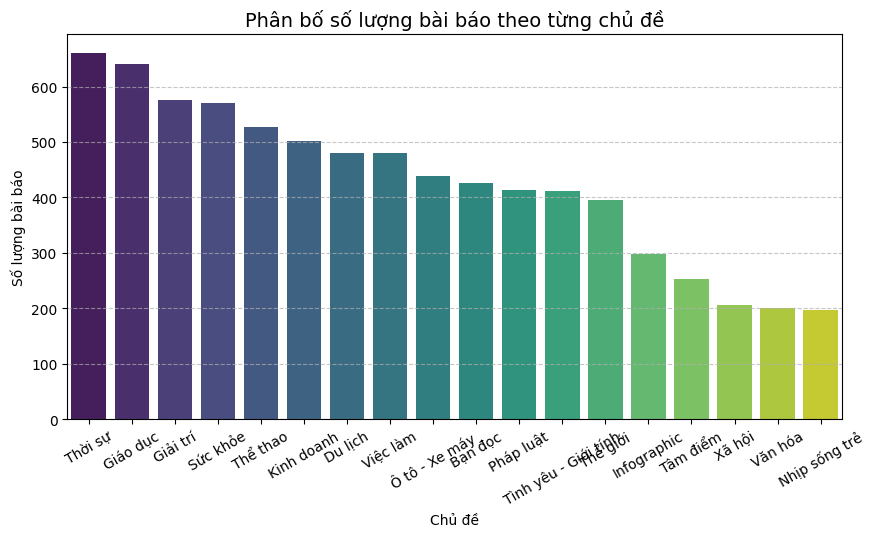

category
Thời sự                 8.6
Giáo dục                8.3
Giải trí                7.5
Sức khỏe                7.4
Thể thao                6.9
Kinh doanh              6.5
Du lịch                 6.3
Việc làm                6.3
Ô tô - Xe máy           5.7
Bạn đọc                 5.5
Pháp luật               5.4
Tình yêu - Giới tính    5.4
Thế giới                5.1
Infographic             3.9
Tâm điểm                3.3
Xã hội                  2.7
Văn hóa                 2.6
Nhịp sống trẻ           2.6
Name: proportion, dtype: float64

In [ ]:
# Phân bố số lượng bài báo theo chủ đề
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="category", order=data["category"].value_counts().index, palette="viridis")
plt.title("Phân bố số lượng bài báo theo từng chủ đề", fontsize=14)
plt.xlabel("Chủ đề")
plt.ylabel("Số lượng bài báo")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# In thêm thống kê
data["category"].value_counts(normalize=True).round(3)*100


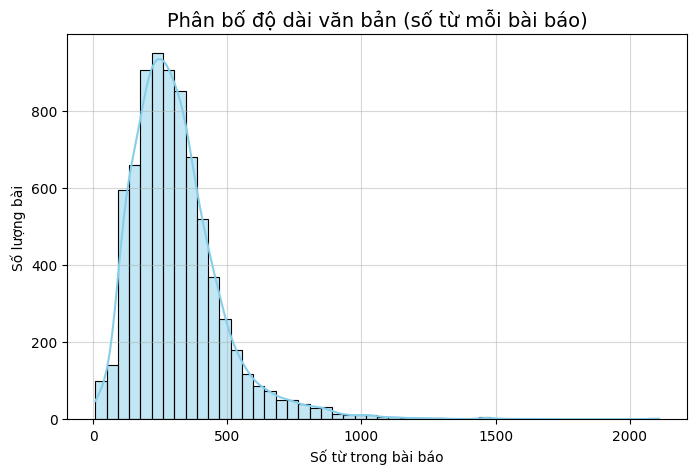

Độ dài trung bình: 310.21
Độ dài lớn nhất: 2109
Độ dài nhỏ nhất: 8


In [ ]:
# Thống kê độ dài nội dung bài báo
data["text_length"] = data["clean_text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.histplot(data["text_length"], bins=50, kde=True, color="skyblue")
plt.title("Phân bố độ dài văn bản (số từ mỗi bài báo)", fontsize=14)
plt.xlabel("Số từ trong bài báo")
plt.ylabel("Số lượng bài")
plt.grid(alpha=0.5)
plt.show()

print("Độ dài trung bình:", round(data["text_length"].mean(), 2))
print("Độ dài lớn nhất:", data["text_length"].max())
print("Độ dài nhỏ nhất:", data["text_length"].min())


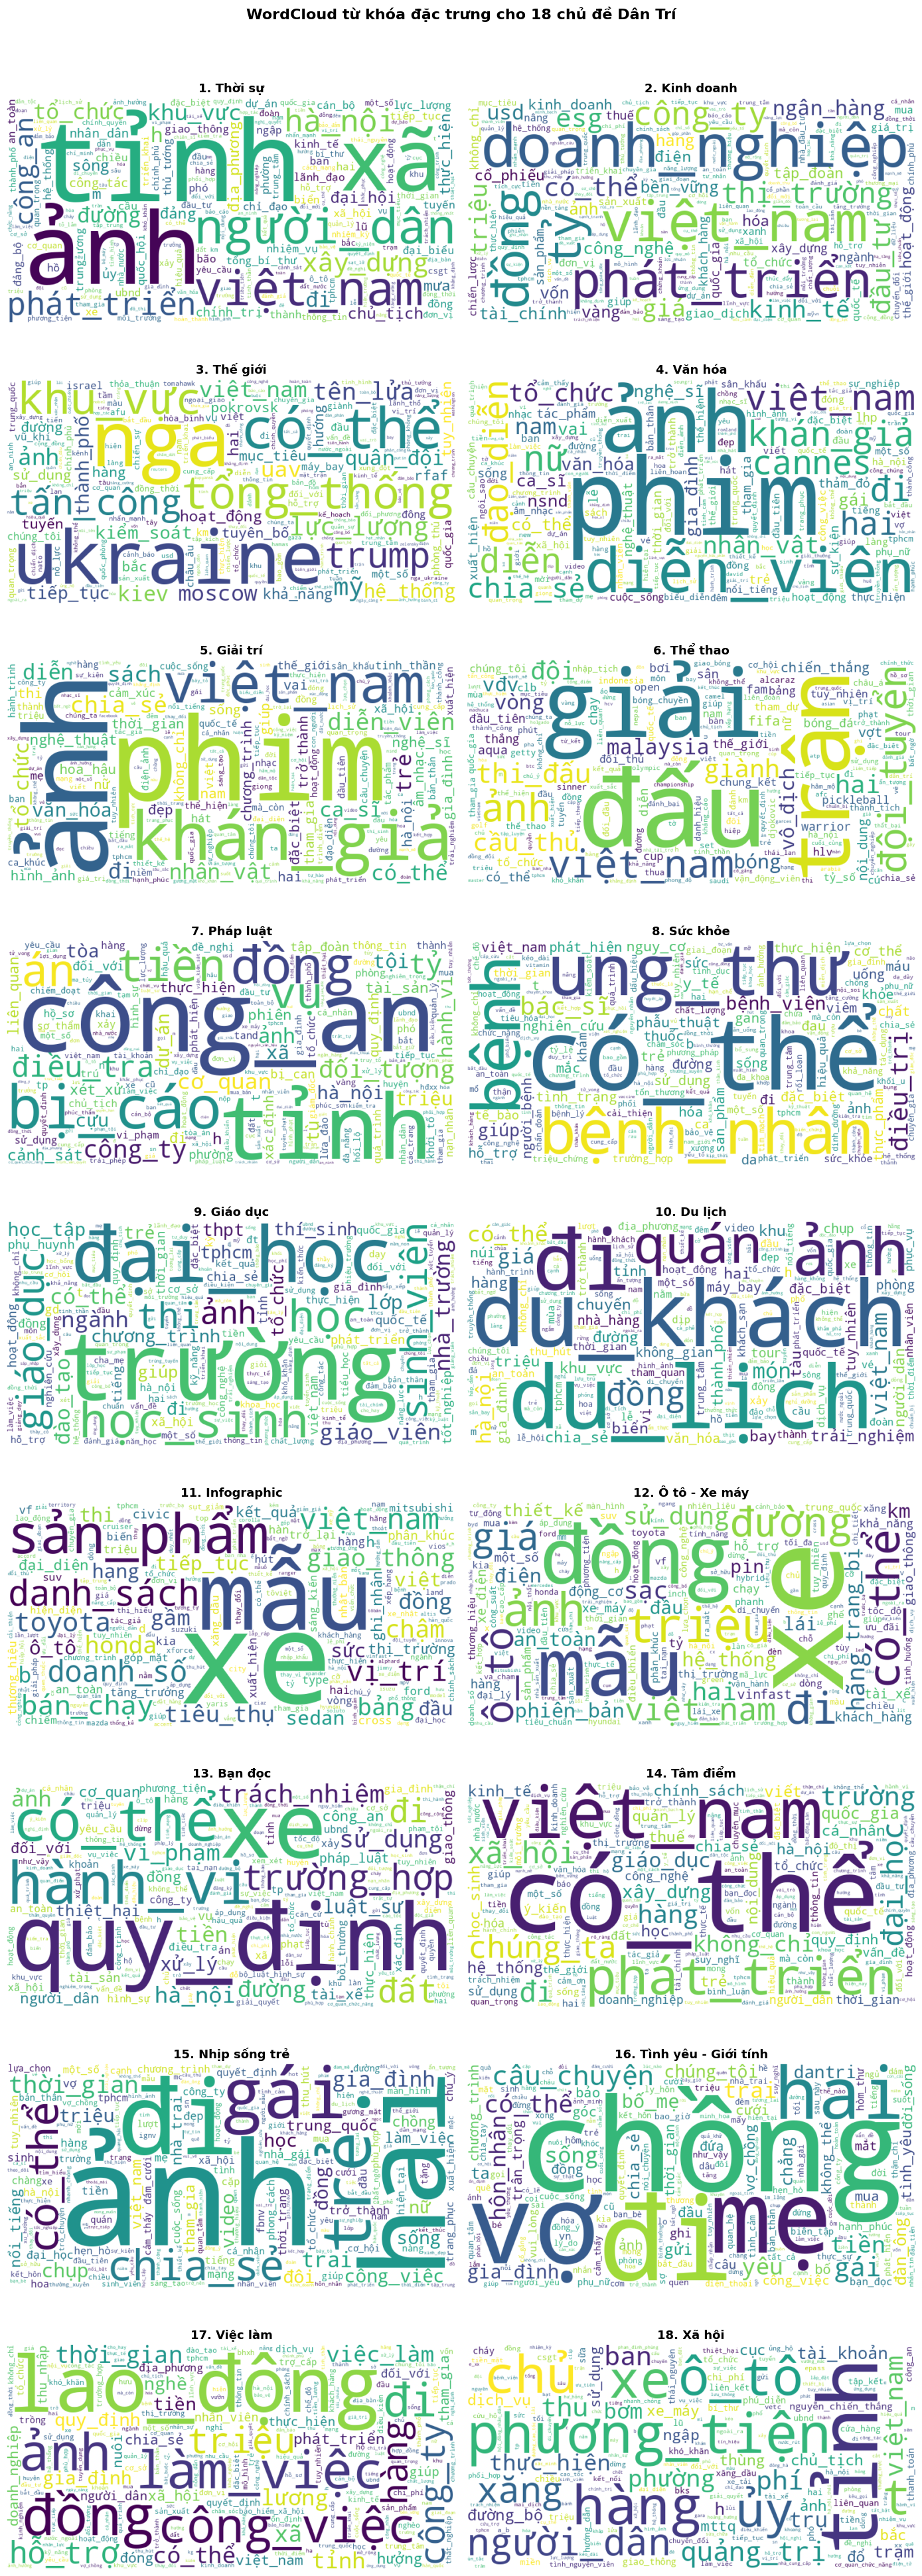

In [ ]:
# WordCloud cho từng chủ đề
from wordcloud import WordCloud

# Lấy danh sách các chủ đề duy nhất
categories = data["category"].unique()

# Tạo figure có 9 hàng × 2 cột = 18 ảnh
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(14, 40))
axes = axes.flatten()

for i, cat in enumerate(categories[:18]):
    text = " ".join(data[data["category"] == cat]["clean_text"])
    wc = WordCloud(width=800, height=400, background_color="white", collocations=False).generate(text)
    axes[i].imshow(wc, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f"{i+1}. {cat}", fontsize=13, weight="bold")

# Ẩn ô trống nếu có
for j in range(len(categories), len(axes)):
    axes[j].axis("off")

plt.suptitle("WordCloud từ khóa đặc trưng cho 18 chủ đề Dân Trí", fontsize=16, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()



/tmp/ipython-input-1690562678.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1690562678.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1690562678.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1690562678.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1690562678.py:17: FutureWarning: 

Passin

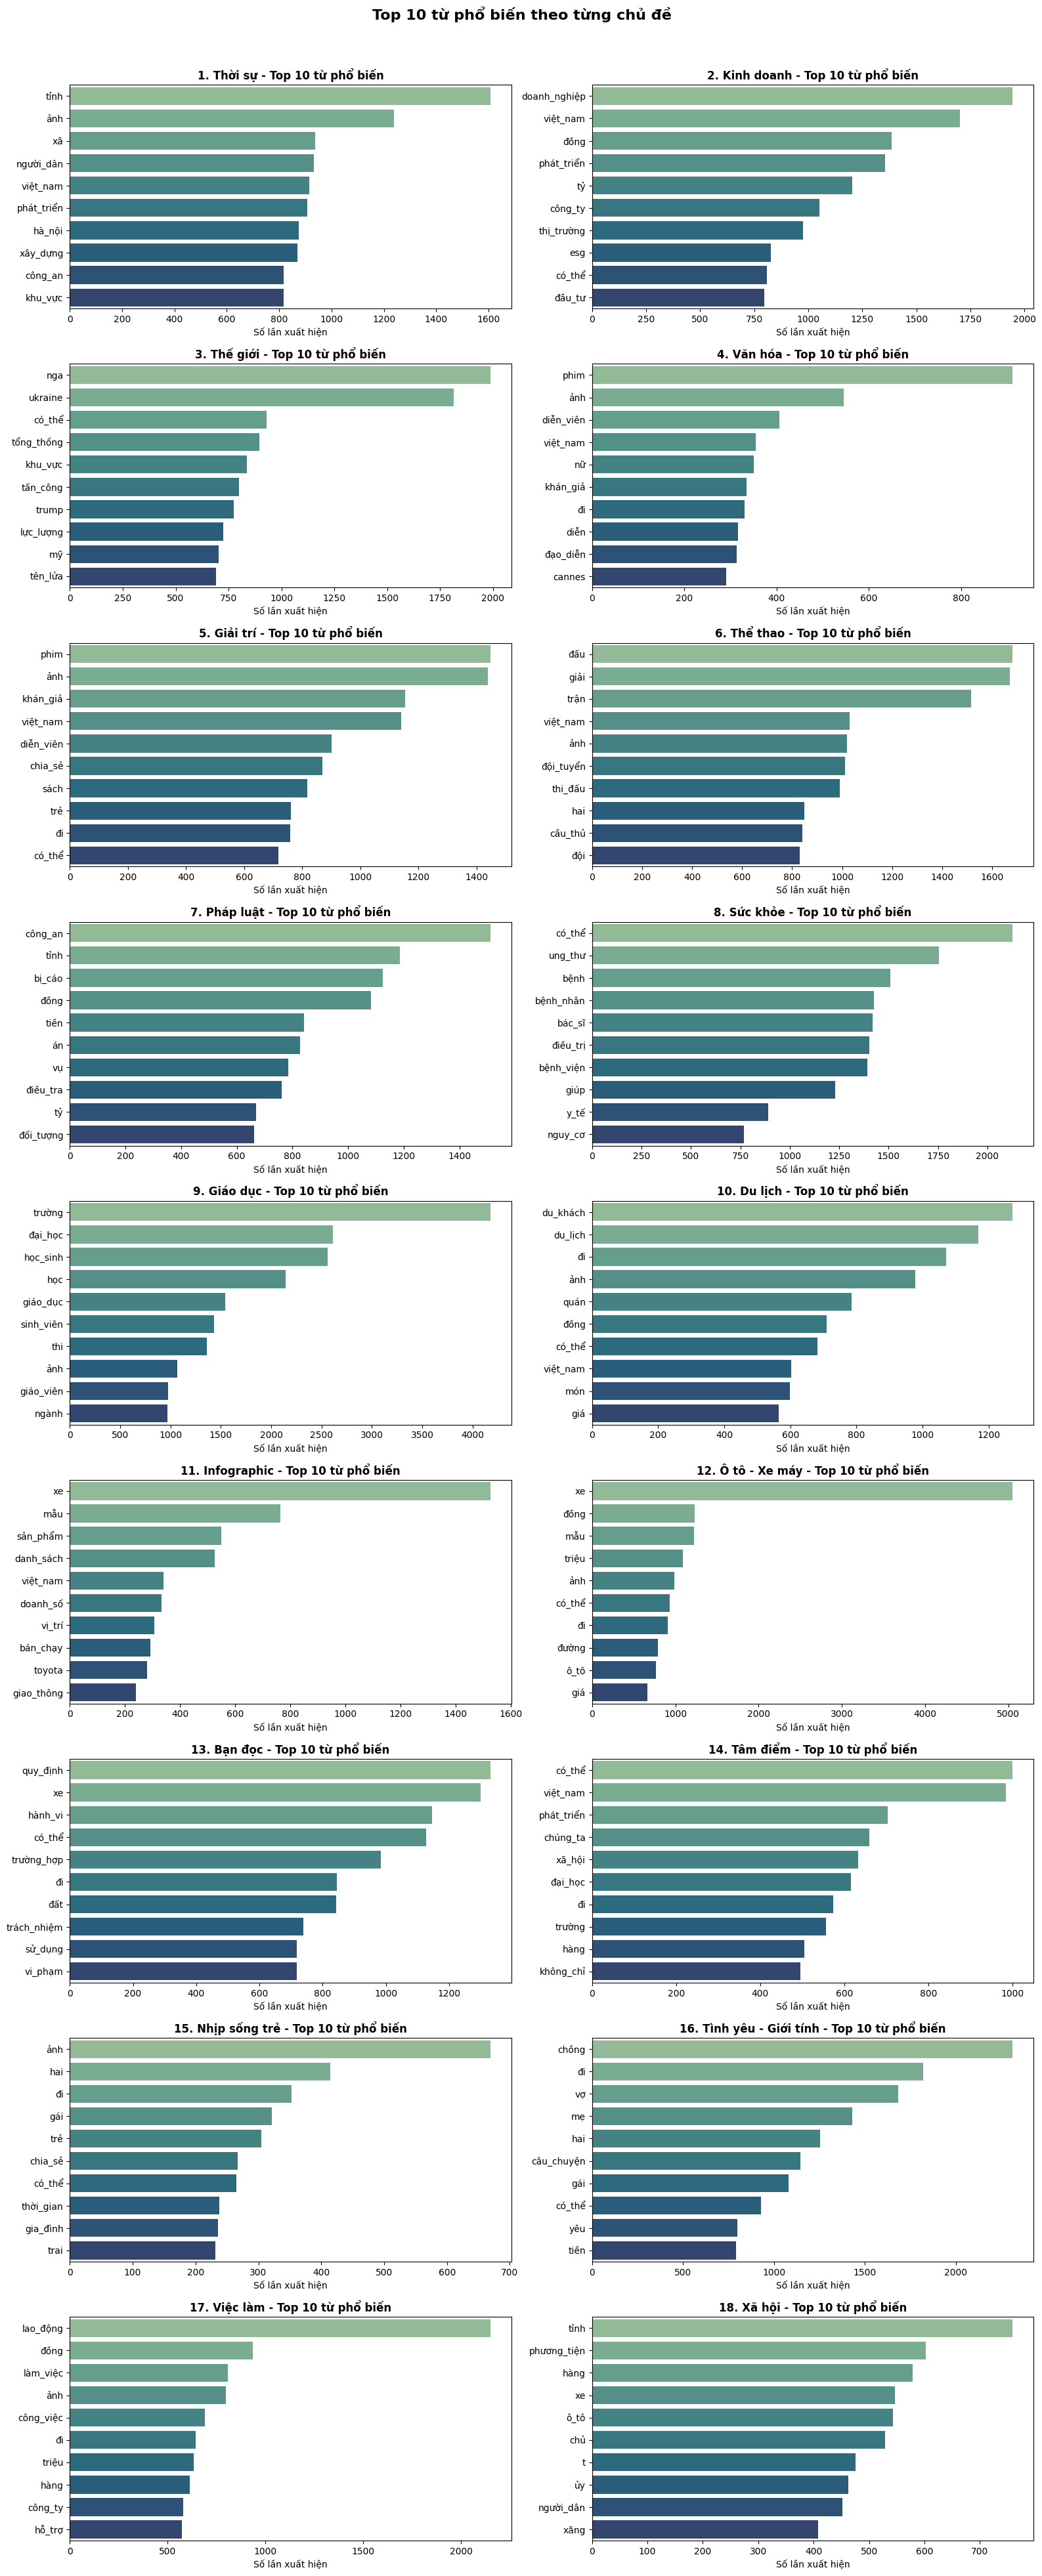

In [ ]:
# Biểu đồ phân phối từ khóa theo từng chủ đề (Top keywords)
from collections import Counter
import seaborn as sns

fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(16, 40))
axes = axes.flatten()

for i, cat in enumerate(categories[:18]):
    # Lấy toàn bộ văn bản của chủ đề
    text = " ".join(data[data["category"] == cat]["clean_text"]).split()
    counter = Counter(text)
    most_common = counter.most_common(10)

    # Chuyển thành DataFrame cho dễ vẽ
    df_words = pd.DataFrame(most_common, columns=["word", "count"])

    sns.barplot(
        data=df_words,
        x="count", y="word",
        ax=axes[i],
        palette="crest"
    )
    axes[i].set_title(f"{i+1}. {cat} - Top 10 từ phổ biến", fontsize=12, weight="bold")
    axes[i].set_xlabel("Số lần xuất hiện")
    axes[i].set_ylabel("")

# Ẩn ô trống nếu có
for j in range(len(categories), len(axes)):
    axes[j].axis("off")

plt.suptitle("Top 10 từ phổ biến theo từng chủ đề", fontsize=16, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


Số lượng mẫu theo từng lớp: Counter({'Thời sự': 661, 'Giáo dục': 641, 'Giải trí': 576, 'Sức khỏe': 570, 'Thể thao': 527, 'Kinh doanh': 502, 'Du lịch': 480, 'Việc làm': 480, 'Ô tô - Xe máy': 439, 'Bạn đọc': 426, 'Pháp luật': 413, 'Tình yêu - Giới tính': 412, 'Thế giới': 395, 'Infographic': 298, 'Tâm điểm': 253, 'Xã hội': 206, 'Văn hóa': 201, 'Nhịp sống trẻ': 198})


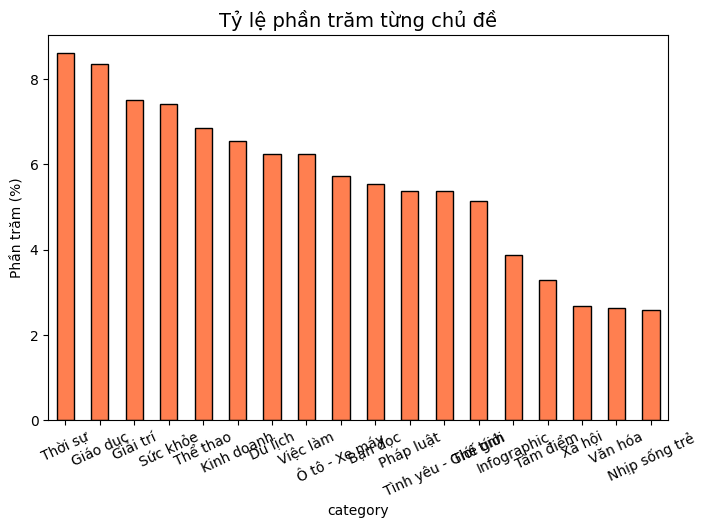

In [ ]:
# Kiểm tra độ cân bằng của dữ liệu
from collections import Counter

counter = Counter(data["category"])
print("Số lượng mẫu theo từng lớp:", counter)

# Vẽ biểu đồ phần trăm
plt.figure(figsize=(8,5))
(data["category"].value_counts(normalize=True) * 100).plot(kind='bar', color='coral', edgecolor='black')
plt.title("Tỷ lệ phần trăm từng chủ đề", fontsize=14)
plt.ylabel("Phần trăm (%)")
plt.xticks(rotation=25)
plt.show()


### embedding


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import os

# ====== ĐỌC DỮ LIỆU ======
path = r"/content/drive/MyDrive/project2/project2b/dantri_balanced.csv"
data = pd.read_csv(path, encoding="utf-8-sig")
print(" Đã đọc dữ liệu:", path)
print(" Số dòng:", len(data))

# ====== CHUẨN BỊ DỮ LIỆU VĂN BẢN ======
# clean_text đã tách từ sẵn (dạng: 'chính_trị xã_hội việt_nam ...')
texts = data["clean_text"].astype(str).tolist()
labels = data["category"].values

# ====== KHỞI TẠO TF-IDF ======
print(" Đang khởi tạo mô hình TF-IDF ...")
tfidf = TfidfVectorizer(
    max_features=3000,        # số lượng đặc trưng tối đa
    ngram_range=(1,2),        # tính cả unigram và bigram
    min_df=3,                 # bỏ qua từ xuất hiện quá ít
    max_df=0.8,               # bỏ qua từ xuất hiện quá nhiều
    sublinear_tf=True,        # áp dụng log-scaling
    norm='l2'                 # chuẩn hóa vector
)

# ====== HUẤN LUYỆN VÀ TẠO EMBEDDING ======
print(" Đang tạo TF-IDF embedding ...")
X_tfidf = tfidf.fit_transform(texts)
X_tfidf = X_tfidf.toarray()

# ====== LƯU KẾT QUẢ ======
tfidf_emb_path = r"/content/drive/MyDrive/project2/project2b/tfidf_embeddings.npy"
labels_path = r"/content/drive/MyDrive/project2/project2b/labels.npy"
np.save(tfidf_emb_path, X_tfidf)
np.save(labels_path, labels)

print(f" Đã lưu:\n  • {tfidf_emb_path}\n  • {labels_path}")

# ====== KIỂM TRA ======
print(" Kích thước TF-IDF embedding:", X_tfidf.shape)
print(" Số lượng nhãn:", len(labels))
print(" Ví dụ 5 nhãn đầu:", np.unique(labels)[:5])
print(" Trung bình giá trị TF-IDF:", np.mean(X_tfidf))


 Đã đọc dữ liệu: /content/drive/MyDrive/project2/project2b/dantri_balanced.csv
 Số dòng: 7678
 Đang khởi tạo mô hình TF-IDF ...
 Đang tạo TF-IDF embedding ...
 Đã lưu:
  • /content/drive/MyDrive/project2/project2b/tfidf_embeddings.npy
  • /content/drive/MyDrive/project2/project2b/labels.npy
 Kích thước TF-IDF embedding: (7678, 3000)
 Số lượng nhãn: 7678
 Ví dụ 5 nhãn đầu: ['Bạn đọc' 'Du lịch' 'Giáo dục' 'Giải trí' 'Infographic']
 Trung bình giá trị TF-IDF: 0.003371689353269966


In [ ]:

import torch
from transformers import AutoTokenizer, AutoModel
import numpy as np
import pandas as pd
from tqdm import tqdm

path = "dantri_balanced.csv"
data = pd.read_csv(path, encoding="utf-8-sig")
print(f" Đã đọc dữ liệu: {path}")
print("Số dòng:", len(data))

# ====== KIỂM TRA GPU ======
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Đang dùng thiết bị: {device}")

# ====== LOAD PHOBERT ======
model_name = "vinai/phobert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)
model.eval()

# ====== HÀM TẠO EMBEDDING (POOLER OUTPUT) ======
def get_phobert_embedding(text):
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding=True,
        max_length=256
    ).to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        # DÙNG pooler_output để giữ ngữ nghĩa tổng thể
        if hasattr(outputs, "pooler_output") and outputs.pooler_output is not None:
            embedding = outputs.pooler_output.squeeze().cpu().numpy()
        else:
            # fallback nếu model không có pooler_output
            embedding = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
    return embedding

# ====== TẠO EMBEDDING CHO TOÀN BỘ ======
print("Đang tạo embedding PhoBERT (pooler_output)...")
embeddings = np.array([get_phobert_embedding(t) for t in tqdm(data["clean_text"])])

# ====== LƯU FILE ======
np.save("phobert_embeddings.npy", embeddings)
np.save("label_pho.npy", data["category"].values)

print(" Đã lưu:")
print("   phobert_embeddings.npy")
print("   label_pho.npy")
print("Kích thước:", embeddings.shape)



In [1]:
import numpy as np
import os

# ==============================
#  Cấu hình đường dẫn
# ==============================
base_dir = r"/content/drive/MyDrive/project2/project2b"

# Embedding paths
tfidf_path   = os.path.join(base_dir, "tfidf_embeddings.npy")
phobert_path = os.path.join(base_dir, "phobert_embeddings.npy")

# Label paths
label_tfidf_path = os.path.join(base_dir, "labels.npy")      # TF-IDF dùng chung nhãn
label_pho_path   = os.path.join(base_dir, "label_pho.npy")   # PhoBERT riêng (nếu có)

# ==============================
#  Hàm đọc và kiểm tra embedding
# ==============================
def inspect_embedding(emb_path, label_path, name):
    """Đọc embedding và nhãn, hiển thị thống kê nhanh"""
    if not os.path.exists(emb_path):
        print(f" File {name} không tồn tại tại đường dẫn:\n{emb_path}\n")
        return None, None

    # Đọc embedding
    emb = np.load(emb_path)
    print(f" {name} loaded thành công!")
    print(f"   Kích thước (shape): {emb.shape}")
    print(f"   Kiểu dữ liệu (dtype): {emb.dtype}")
    print(f"   Giá trị trung bình: {np.mean(emb):.6f}")
    print(f"   Min / Max: ({np.min(emb):.6f}, {np.max(emb):.6f})")

    # Kiểm tra NaN / Infinity
    n_nan = np.isnan(emb).sum()
    n_inf = np.isinf(emb).sum()
    if n_nan > 0 or n_inf > 0:
        print(f"  Phát hiện {n_nan} NaN và {n_inf} giá trị vô cực.")
    else:
        print("    Không có giá trị NaN hoặc Infinity.")

    # Hiển thị 2 mẫu đầu tiên
    print(f"    Mẫu 2 embedding đầu tiên:\n{emb[:2]}\n")

    # ====== Đọc label tương ứng ======
    labels = None
    if os.path.exists(label_path):
        labels = np.load(label_path, allow_pickle=True)
        print(f"   Đã load label từ: {os.path.basename(label_path)}")
        print(f"   Số lượng nhãn: {len(labels)}")
        if emb.shape[0] != len(labels):
            print(f"    KHÔNG KHỚP! Embedding có {emb.shape[0]} hàng, label có {len(labels)}!")
        else:
            print(f"    Số lượng embedding và label khớp nhau ({emb.shape[0]}).")
    else:
        print(f"    Không tìm thấy file label cho {name} tại: {label_path}")

    print("-" * 60)
    return emb, labels


# ==============================
#  Kiểm tra từng embedding
# ==============================
emb_tfidf,  labels_tfidf = inspect_embedding(tfidf_path, label_tfidf_path, "TF-IDF Embedding")
emb_phobert, labels_pho  = inspect_embedding(phobert_path, label_pho_path, "PhoBERT Embedding")

# ==============================
#  So sánh nhanh
# ==============================
if emb_tfidf is not None and emb_phobert is not None:
    print(" So sánh nhanh trung bình vector:")
    print(f"   TF-IDF  : {np.mean(emb_tfidf):.6f}")
    print(f"   PhoBERT : {np.mean(emb_phobert):.6f}")
    print(f"   → Chênh lệch trung bình: {abs(np.mean(emb_tfidf) - np.mean(emb_phobert)):.6f}")


 TF-IDF Embedding loaded thành công!
   Kích thước (shape): (7678, 3000)
   Kiểu dữ liệu (dtype): float64
   Giá trị trung bình: 0.003372
   Min / Max: (0.000000, 0.756115)
    Không có giá trị NaN hoặc Infinity.
    Mẫu 2 embedding đầu tiên:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

   Đã load label từ: labels.npy
   Số lượng nhãn: 7678
    Số lượng embedding và label khớp nhau (7678).
------------------------------------------------------------
 PhoBERT Embedding loaded thành công!
   Kích thước (shape): (7678, 768)
   Kiểu dữ liệu (dtype): float32
   Giá trị trung bình: 0.000404
   Min / Max: (-0.792784, 0.791698)
    Không có giá trị NaN hoặc Infinity.
    Mẫu 2 embedding đầu tiên:
[[ 0.20034648  0.12331062 -0.1876099  ...  0.2475983   0.1871265
  -0.01884336]
 [ 0.05385829  0.27864462 -0.12612808 ... -0.1266904   0.26363397
   0.16376686]]

   Đã load label từ: label_pho.npy
   Số lượng nhãn: 7678
    Số lượng embedding và label khớp nhau (7678).
------------------------

### chia train/test

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import os

# ==============================
#  Đọc embedding và label
# ==============================
base_dir = r"/content/drive/MyDrive/project2/project2b"

# Đọc embedding
emb_phobert = np.load(os.path.join(base_dir, "phobert_embeddings.npy"))
emb_tfidf   = np.load(os.path.join(base_dir, "tfidf_embeddings.npy"))

# Đọc label
y_pho = np.load(os.path.join(base_dir, "label_pho.npy"), allow_pickle=True)
y_tfidf = np.load(os.path.join(base_dir, "labels.npy"), allow_pickle=True)

print(" Đã load toàn bộ embedding và label.")
print(f"PhoBERT shape : {emb_phobert.shape}")
print(f"TF-IDF shape  : {emb_tfidf.shape}")
print(f"Số lượng label PhoBERT: {len(y_pho)}")
print(f"Số lượng label TF-IDF : {len(y_tfidf)}")

# ==============================
#  Chia train/test (80/20) – stratify theo lớp
# ==============================
X_train_pho, X_test_pho, y_train_pho, y_test_pho = train_test_split(
    emb_phobert, y_pho,
    test_size=0.2,
    stratify=y_pho,
    random_state=42
)

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    emb_tfidf, y_tfidf,
    test_size=0.2,
    stratify=y_tfidf,
    random_state=42
)

# ==============================
#  Kiểm tra kết quả
# ==============================
print(" Kết quả chia dữ liệu:")
print(f"PhoBERT  → Train: {X_train_pho.shape}, Test: {X_test_pho.shape}")
print(f"TF-IDF   → Train: {X_train_tfidf.shape}, Test: {X_test_tfidf.shape}")

print(" Phân phối lớp (PhoBERT):")
print("Train:", Counter(y_train_pho))
print("Test :", Counter(y_test_pho))

print(" Phân phối lớp (TF-IDF):")
print("Train:", Counter(y_train_tfidf))
print("Test :", Counter(y_test_tfidf))


 Đã load toàn bộ embedding và label.
PhoBERT shape : (7678, 768)
TF-IDF shape  : (7678, 3000)
Số lượng label PhoBERT: 7678
Số lượng label TF-IDF : 7678
 Kết quả chia dữ liệu:
PhoBERT  → Train: (6142, 768), Test: (1536, 768)
TF-IDF   → Train: (6142, 3000), Test: (1536, 3000)
 Phân phối lớp (PhoBERT):
Train: Counter({'Thời sự': 529, 'Giáo dục': 513, 'Giải trí': 461, 'Sức khỏe': 456, 'Thể thao': 421, 'Kinh doanh': 402, 'Việc làm': 384, 'Du lịch': 384, 'Ô tô - Xe máy': 351, 'Bạn đọc': 341, 'Pháp luật': 330, 'Tình yêu - Giới tính': 330, 'Thế giới': 316, 'Infographic': 238, 'Tâm điểm': 202, 'Xã hội': 165, 'Văn hóa': 161, 'Nhịp sống trẻ': 158})
Test : Counter({'Thời sự': 132, 'Giáo dục': 128, 'Giải trí': 115, 'Sức khỏe': 114, 'Thể thao': 106, 'Kinh doanh': 100, 'Du lịch': 96, 'Việc làm': 96, 'Ô tô - Xe máy': 88, 'Bạn đọc': 85, 'Pháp luật': 83, 'Tình yêu - Giới tính': 82, 'Thế giới': 79, 'Infographic': 60, 'Tâm điểm': 51, 'Xã hội': 41, 'Văn hóa': 40, 'Nhịp sống trẻ': 40})
 Phân phối lớp (TF-ID

### Scale

In [ ]:
from sklearn.preprocessing import StandardScaler

# =======================================================
#  Scale PhoBERT train & test (fit trên train)
# =======================================================
scaler_pho = StandardScaler()
X_train_pho_scaled = scaler_pho.fit_transform(X_train_pho)   # fit + transform train
X_test_pho_scaled  = scaler_pho.transform(X_test_pho)        # chỉ transform test

print(" PhoBERT scaled bằng StandardScaler:")
print(f"   Train mean: {X_train_pho_scaled.mean():.6f}, std: {X_train_pho_scaled.std():.6f}")
print(f"   Test mean : {X_test_pho_scaled.mean():.6f}, std: {X_test_pho_scaled.std():.6f}")
print(f"   Train shape: {X_train_pho_scaled.shape}, Test shape: {X_test_pho_scaled.shape}")

# =======================================================
#  Giữ nguyên TF-IDF (không scale)
# =======================================================
X_train_tfidf_scaled = X_train_tfidf.copy()
X_test_tfidf_scaled = X_test_tfidf.copy()

print("\n TF-IDF giữ nguyên (không scale):")
print(f"   Train shape: {X_train_tfidf_scaled.shape}")
print(f"   Test shape : {X_test_tfidf_scaled.shape}")


 PhoBERT scaled bằng StandardScaler:
   Train mean: 0.000000, std: 1.000000
   Test mean : -0.001141, std: 1.000328
   Train shape: (6142, 768), Test shape: (1536, 768)

 TF-IDF giữ nguyên (không scale):
   Train shape: (6142, 3000)
   Test shape : (1536, 3000)


### huấn luyện mô hình

===  Logistic Regression - PhoBERT ===
Accuracy : 0.8086
Precision: 0.7923
Recall   : 0.7977
F1-score : 0.7941

Classification Report (PhoBERT):
                      precision    recall  f1-score   support

             Bạn đọc       0.69      0.71      0.70        85
             Du lịch       0.78      0.79      0.78        96
            Giáo dục       0.79      0.81      0.80       128
            Giải trí       0.76      0.64      0.70       115
         Infographic       0.92      1.00      0.96        60
          Kinh doanh       0.81      0.76      0.78       100
       Nhịp sống trẻ       0.57      0.68      0.62        40
           Pháp luật       0.87      0.89      0.88        83
            Sức khỏe       0.89      0.94      0.91       114
            Thế giới       0.91      0.86      0.88        79
            Thể thao       0.96      0.94      0.95       106
             Thời sự       0.81      0.79      0.80       132
            Tâm điểm       0.50      0.43      0

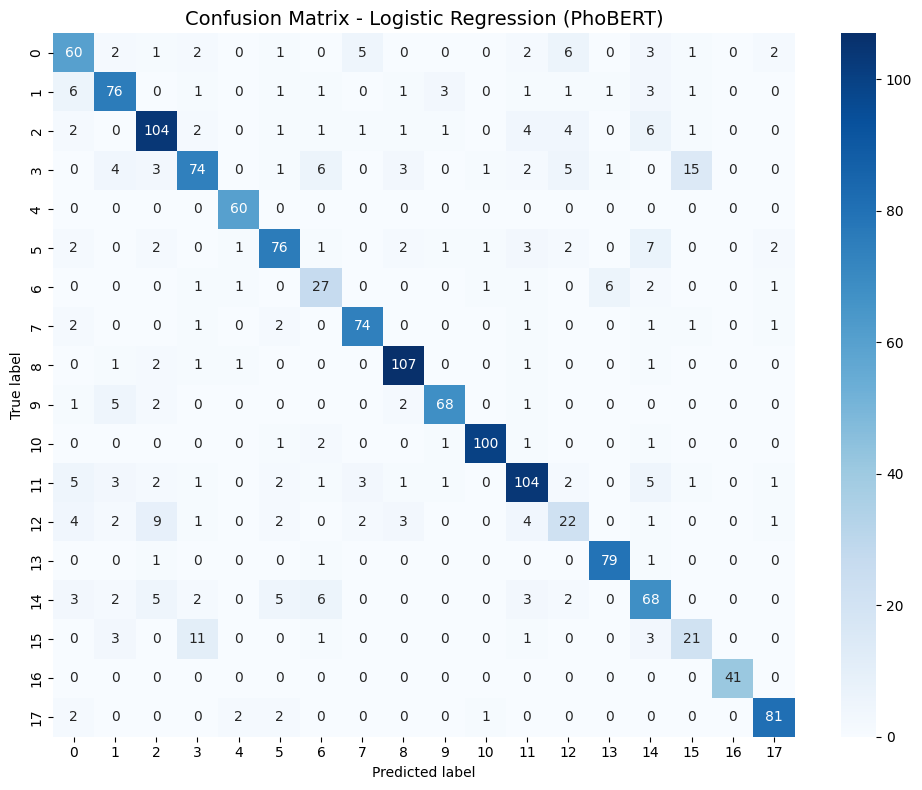

=== Logistic Regression - TF-IDF ===
Accuracy : 0.8691
Precision: 0.8620
Recall   : 0.8658
F1-score : 0.8631

Classification Report (TF-IDF):
                      precision    recall  f1-score   support

             Bạn đọc       0.77      0.78      0.77        85
             Du lịch       0.78      0.90      0.83        96
            Giáo dục       0.93      0.89      0.91       128
            Giải trí       0.83      0.78      0.80       115
         Infographic       0.98      0.93      0.96        60
          Kinh doanh       0.88      0.86      0.87       100
       Nhịp sống trẻ       0.59      0.72      0.65        40
           Pháp luật       0.91      0.94      0.92        83
            Sức khỏe       0.92      0.94      0.93       114
            Thế giới       0.92      0.90      0.91        79
            Thể thao       0.96      0.97      0.97       106
             Thời sự       0.85      0.77      0.81       132
            Tâm điểm       0.98      0.96      0.97

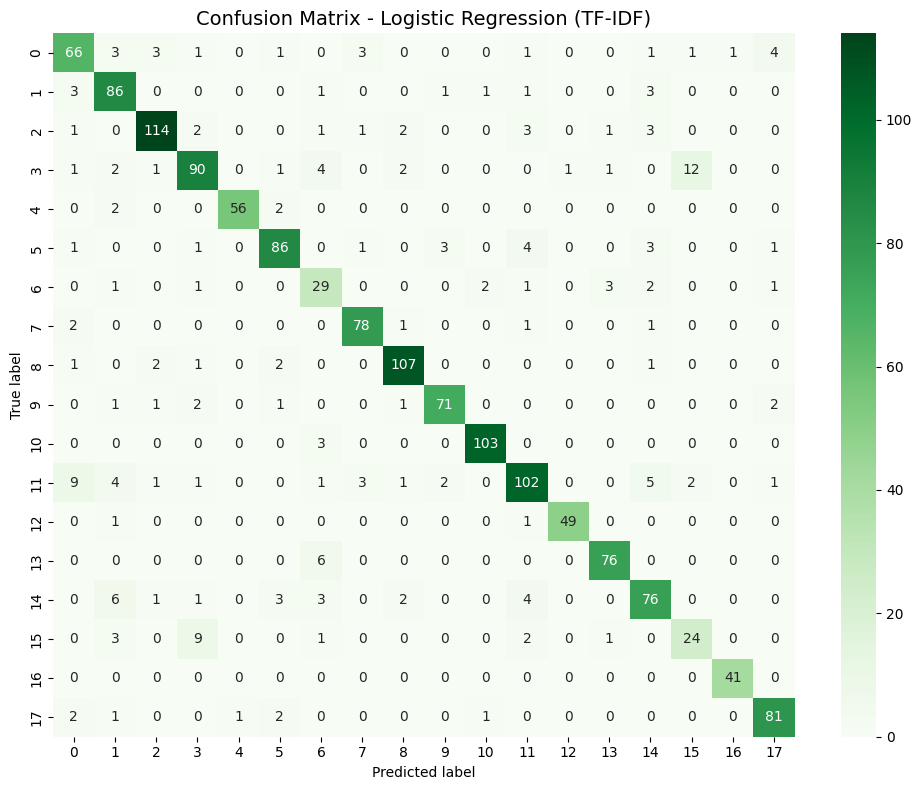

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ==========================================================
#  Logistic Regression - PhoBERT
# ==========================================================
log_reg_pho = LogisticRegression(
    max_iter=3000,
    class_weight='balanced',
    solver='lbfgs',
    random_state=42
)
log_reg_pho.fit(X_train_pho_scaled, y_train_pho)
y_pred_pho = log_reg_pho.predict(X_test_pho_scaled)

print("===  Logistic Regression - PhoBERT ===")
print(f"Accuracy : {accuracy_score(y_test_pho, y_pred_pho):.4f}")
print(f"Precision: {precision_score(y_test_pho, y_pred_pho, average='macro'):.4f}")
print(f"Recall   : {recall_score(y_test_pho, y_pred_pho, average='macro'):.4f}")
print(f"F1-score : {f1_score(y_test_pho, y_pred_pho, average='macro'):.4f}")
print("\nClassification Report (PhoBERT):")
print(classification_report(y_test_pho, y_pred_pho))

# Confusion Matrix PhoBERT
plt.figure(figsize=(10, 8))
cm_pho = confusion_matrix(y_test_pho, y_pred_pho, labels=np.unique(y_test_pho))
sns.heatmap(cm_pho, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix - Logistic Regression (PhoBERT)", fontsize=14)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()


# ==========================================================
#  Logistic Regression - TF-IDF
# ==========================================================
log_reg_tfidf = LogisticRegression(
    max_iter=3000,
    class_weight='balanced',
    solver='lbfgs',
    random_state=42
)
log_reg_tfidf.fit(X_train_tfidf_scaled, y_train_tfidf)
y_pred_tfidf = log_reg_tfidf.predict(X_test_tfidf_scaled)

print("=== Logistic Regression - TF-IDF ===")
print(f"Accuracy : {accuracy_score(y_test_pho, y_pred_tfidf):.4f}")
print(f"Precision: {precision_score(y_test_pho, y_pred_tfidf, average='macro'):.4f}")
print(f"Recall   : {recall_score(y_test_pho, y_pred_tfidf, average='macro'):.4f}")
print(f"F1-score : {f1_score(y_test_pho, y_pred_tfidf, average='macro'):.4f}")
print("\nClassification Report (TF-IDF):")
print(classification_report(y_test_pho, y_pred_tfidf))

# Confusion Matrix TF-IDF
plt.figure(figsize=(10, 8))
cm_tfidf = confusion_matrix(y_test_pho, y_pred_tfidf, labels=np.unique(y_test_pho))
sns.heatmap(cm_tfidf, annot=True, fmt="d", cmap="Greens", cbar=True)
plt.title("Confusion Matrix - Logistic Regression (TF-IDF)", fontsize=14)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()




=== Random Forest - PhoBERT ===
Accuracy : 0.7878
Precision: 0.8265
Recall   : 0.7398
F1-score : 0.7363

Classification Report (PhoBERT):
                      precision    recall  f1-score   support

             Bạn đọc       0.82      0.64      0.72        85
             Du lịch       0.72      0.82      0.77        96
            Giáo dục       0.76      0.84      0.80       128
            Giải trí       0.58      0.85      0.69       115
         Infographic       0.98      1.00      0.99        60
          Kinh doanh       0.83      0.84      0.84       100
       Nhịp sống trẻ       0.86      0.15      0.26        40
           Pháp luật       0.88      0.94      0.91        83
            Sức khỏe       0.90      0.85      0.87       114
            Thế giới       0.83      0.82      0.83        79
            Thể thao       0.94      0.96      0.95       106
             Thời sự       0.64      0.87      0.74       132
            Tâm điểm       0.68      0.33      0.45   

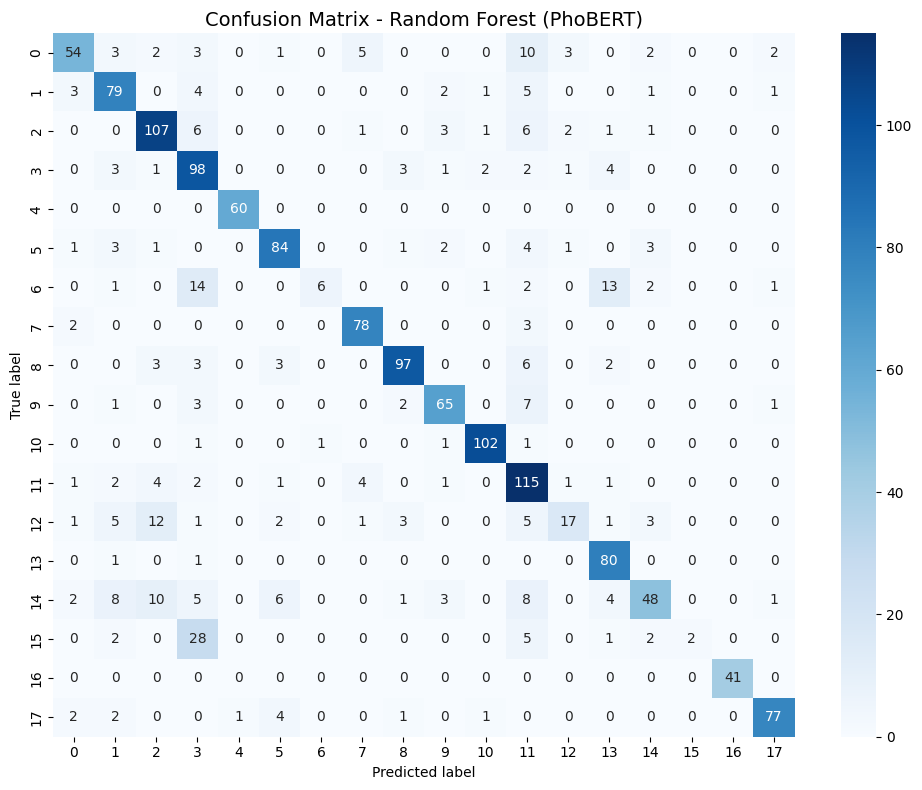


=== Random Forest - TF-IDF ===
Accuracy : 0.8424
Precision: 0.8682
Recall   : 0.8208
F1-score : 0.8270

Classification Report (TF-IDF):
                      precision    recall  f1-score   support

             Bạn đọc       0.89      0.64      0.74        85
             Du lịch       0.75      0.80      0.77        96
            Giáo dục       0.85      0.93      0.89       128
            Giải trí       0.70      0.83      0.76       115
         Infographic       1.00      1.00      1.00        60
          Kinh doanh       0.88      0.84      0.86       100
       Nhịp sống trẻ       0.71      0.50      0.59        40
           Pháp luật       0.91      0.93      0.92        83
            Sức khỏe       0.84      0.93      0.88       114
            Thế giới       0.91      0.80      0.85        79
            Thể thao       0.93      0.96      0.94       106
             Thời sự       0.70      0.84      0.77       132
            Tâm điểm       1.00      1.00      1.00     

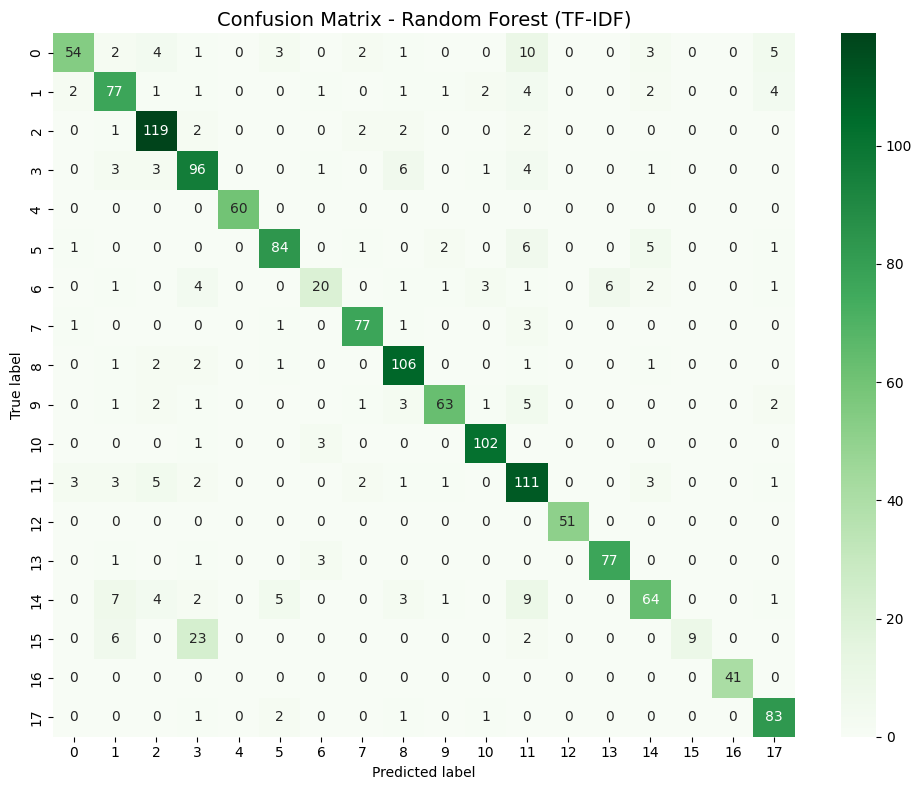

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ==========================================================
#  Random Forest - PhoBERT
# ==========================================================
rf_pho = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced'
)
rf_pho.fit(X_train_pho_scaled, y_train_pho)
y_pred_pho = rf_pho.predict(X_test_pho_scaled)

print("\n=== Random Forest - PhoBERT ===")
print(f"Accuracy : {accuracy_score(y_test_pho, y_pred_pho):.4f}")
print(f"Precision: {precision_score(y_test_pho, y_pred_pho, average='macro'):.4f}")
print(f"Recall   : {recall_score(y_test_pho, y_pred_pho, average='macro'):.4f}")
print(f"F1-score : {f1_score(y_test_pho, y_pred_pho, average='macro'):.4f}")
print("\nClassification Report (PhoBERT):")
print(classification_report(y_test_pho, y_pred_pho))

# Confusion Matrix PhoBERT (có số)
plt.figure(figsize=(10, 8))
cm_pho = confusion_matrix(y_test_pho, y_pred_pho, labels=np.unique(y_test_pho))
sns.heatmap(cm_pho, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix - Random Forest (PhoBERT)", fontsize=14)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()


# ==========================================================
#  Random Forest - TF-IDF
# ==========================================================
rf_tf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced'
)
rf_tf.fit(X_train_tfidf_scaled, y_train_tfidf)
y_pred_tf = rf_tf.predict(X_test_tfidf_scaled)

print("\n=== Random Forest - TF-IDF ===")
print(f"Accuracy : {accuracy_score(y_test_pho, y_pred_tf):.4f}")
print(f"Precision: {precision_score(y_test_pho, y_pred_tf, average='macro'):.4f}")
print(f"Recall   : {recall_score(y_test_pho, y_pred_tf, average='macro'):.4f}")
print(f"F1-score : {f1_score(y_test_pho, y_pred_tf, average='macro'):.4f}")
print("\nClassification Report (TF-IDF):")
print(classification_report(y_test_pho, y_pred_tf))

# Confusion Matrix TF-IDF
plt.figure(figsize=(10, 8))
cm_tf = confusion_matrix(y_test_pho, y_pred_tf, labels=np.unique(y_test_pho))
sns.heatmap(cm_tf, annot=True, fmt="d", cmap="Greens", cbar=True)
plt.title("Confusion Matrix - Random Forest (TF-IDF)", fontsize=14)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()



=== XGBoost - PhoBERT ===
Accuracy : 0.8034
Precision: 0.7921
Recall   : 0.7670
F1-score : 0.7683

Báo cáo chi tiết:
                       precision    recall  f1-score   support

             Bạn đọc       0.76      0.68      0.72        85
             Du lịch       0.72      0.85      0.78        96
            Giáo dục       0.81      0.86      0.84       128
            Giải trí       0.65      0.80      0.72       115
         Infographic       0.97      0.95      0.96        60
          Kinh doanh       0.84      0.84      0.84       100
       Nhịp sống trẻ       0.63      0.42      0.51        40
           Pháp luật       0.86      0.92      0.89        83
            Sức khỏe       0.91      0.88      0.89       114
            Thế giới       0.84      0.84      0.84        79
            Thể thao       0.92      0.94      0.93       106
             Thời sự       0.74      0.83      0.78       132
            Tâm điểm       0.66      0.37      0.47        51
Tình yêu - G

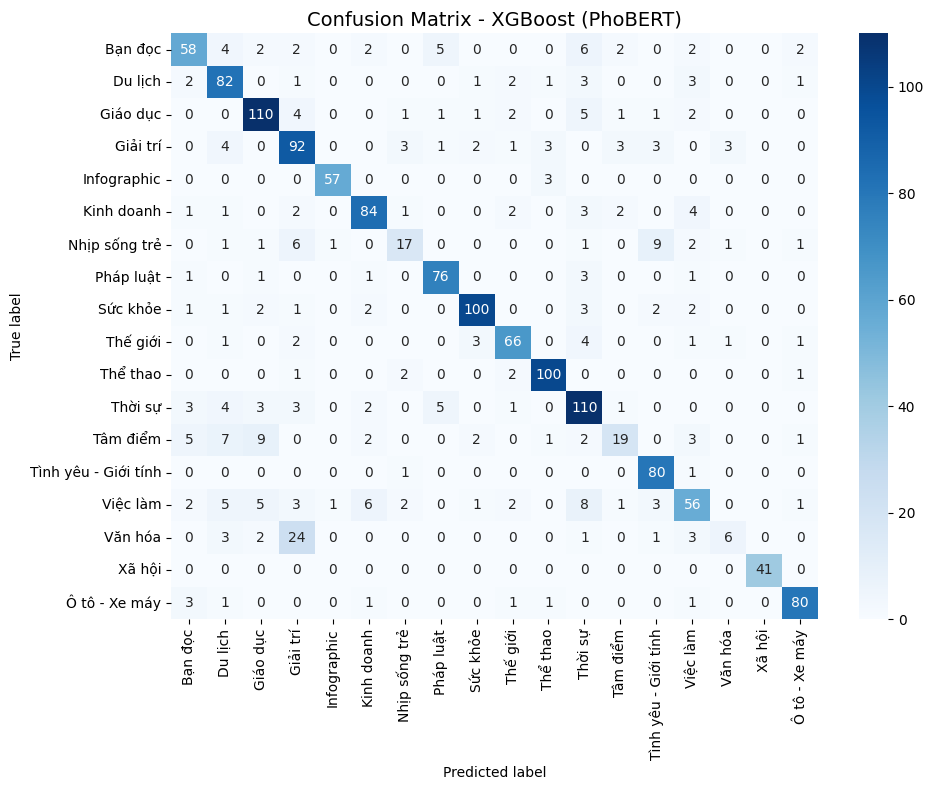


=== XGBoost - TF-IDF ===
Accuracy : 0.8659
Precision: 0.8699
Recall   : 0.8550
F1-score : 0.8587

Báo cáo chi tiết:
                       precision    recall  f1-score   support

             Bạn đọc       0.80      0.81      0.81        85
             Du lịch       0.83      0.83      0.83        96
            Giáo dục       0.83      0.92      0.87       128
            Giải trí       0.76      0.81      0.78       115
         Infographic       0.95      1.00      0.98        60
          Kinh doanh       0.91      0.84      0.88       100
       Nhịp sống trẻ       0.68      0.65      0.67        40
           Pháp luật       0.90      0.92      0.91        83
            Sức khỏe       0.94      0.96      0.95       114
            Thế giới       0.91      0.89      0.90        79
            Thể thao       0.93      0.94      0.93       106
             Thời sự       0.76      0.81      0.78       132
            Tâm điểm       1.00      1.00      1.00        51
Tình yêu - Gi

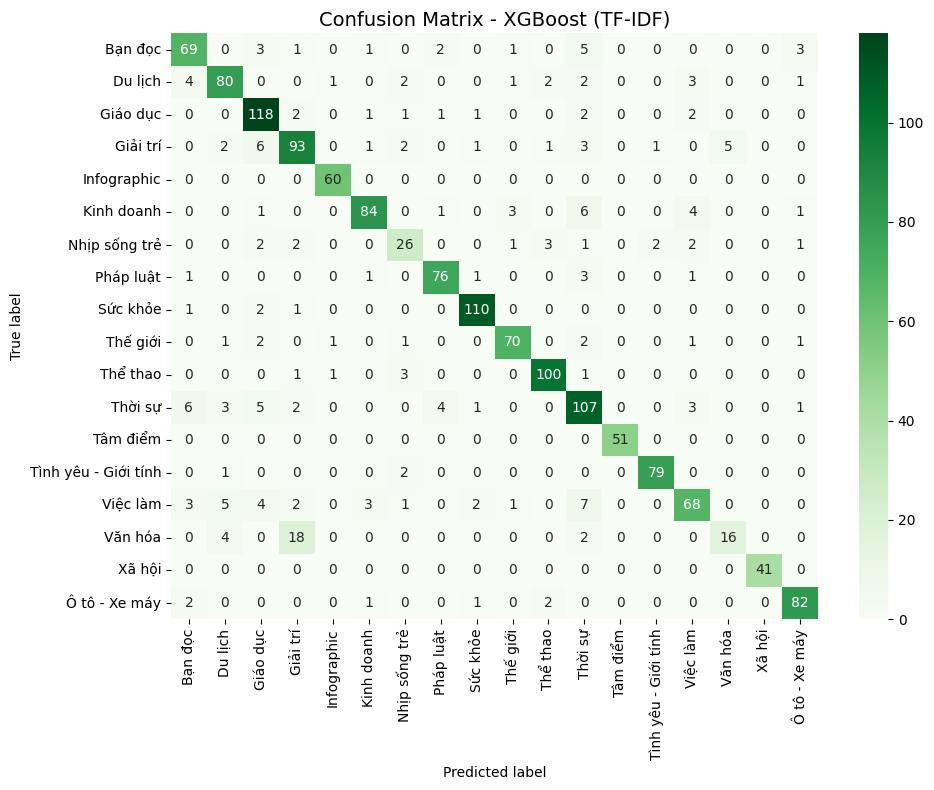

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ==========================================================
#  MÃ HÓA NHÃN (Label Encoding)
# ==========================================================
le = LabelEncoder()
le.fit(np.concatenate([y_train_pho, y_test_pho]))  # fit trên toàn bộ nhãn để nhất quán

y_train_pho_enc = le.transform(y_train_pho)
y_test_pho_enc  = le.transform(y_test_pho)
y_train_tfidf_enc = le.transform(y_train_tfidf)
y_test_tfidf_enc  = le.transform(y_test_tfidf)

labels = le.classes_

# ==========================================================
#  XGBoost - PhoBERT
# ==========================================================
xgb_pho = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    eval_metric="mlogloss",
    random_state=42
)
xgb_pho.fit(X_train_pho_scaled, y_train_pho_enc)
y_pred_pho = xgb_pho.predict(X_test_pho_scaled)

print("\n=== XGBoost - PhoBERT ===")
print(f"Accuracy : {accuracy_score(y_test_pho_enc, y_pred_pho):.4f}")
print(f"Precision: {precision_score(y_test_pho_enc, y_pred_pho, average='macro'):.4f}")
print(f"Recall   : {recall_score(y_test_pho_enc, y_pred_pho, average='macro'):.4f}")
print(f"F1-score : {f1_score(y_test_pho_enc, y_pred_pho, average='macro'):.4f}")
print("\nBáo cáo chi tiết:\n", classification_report(y_test_pho_enc, y_pred_pho, target_names=labels))

# Confusion Matrix PhoBERT (có số)
plt.figure(figsize=(10, 8))
cm_pho = confusion_matrix(y_test_pho_enc, y_pred_pho)
sns.heatmap(cm_pho, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - XGBoost (PhoBERT)", fontsize=14)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()


# ==========================================================
#  XGBoost - TF-IDF
# ==========================================================
xgb_tfidf = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    eval_metric="mlogloss",
    random_state=42
)
xgb_tfidf.fit(X_train_tfidf_scaled, y_train_tfidf_enc)
y_pred_tfidf = xgb_tfidf.predict(X_test_tfidf_scaled)

print("\n=== XGBoost - TF-IDF ===")
print(f"Accuracy : {accuracy_score(y_test_tfidf_enc, y_pred_tfidf):.4f}")
print(f"Precision: {precision_score(y_test_tfidf_enc, y_pred_tfidf, average='macro'):.4f}")
print(f"Recall   : {recall_score(y_test_tfidf_enc, y_pred_tfidf, average='macro'):.4f}")
print(f"F1-score : {f1_score(y_test_tfidf_enc, y_pred_tfidf, average='macro'):.4f}")
print("\nBáo cáo chi tiết:\n", classification_report(y_test_tfidf_enc, y_pred_tfidf, target_names=labels))

# Confusion Matrix TF-IDF (có số)
plt.figure(figsize=(10, 8))
cm_tfidf = confusion_matrix(y_test_tfidf_enc, y_pred_tfidf)
sns.heatmap(cm_tfidf, annot=True, fmt="d", cmap="Greens",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - XGBoost (TF-IDF)", fontsize=14)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()



=== Naive Bayes - PhoBERT ===
Accuracy : 0.7272
Precision: 0.7265
Recall   : 0.7296
F1-score : 0.7206

Báo cáo chi tiết:
                       precision    recall  f1-score   support

             Bạn đọc       0.62      0.60      0.61        85
             Du lịch       0.67      0.77      0.71        96
            Giáo dục       0.83      0.57      0.68       128
            Giải trí       0.72      0.51      0.60       115
         Infographic       0.88      0.82      0.84        60
          Kinh doanh       0.71      0.75      0.73       100
       Nhịp sống trẻ       0.41      0.65      0.50        40
           Pháp luật       0.84      0.89      0.87        83
            Sức khỏe       0.90      0.76      0.82       114
            Thế giới       0.80      0.81      0.81        79
            Thể thao       0.92      0.92      0.92       106
             Thời sự       0.63      0.77      0.69       132
            Tâm điểm       0.40      0.63      0.48        51
Tình yêu

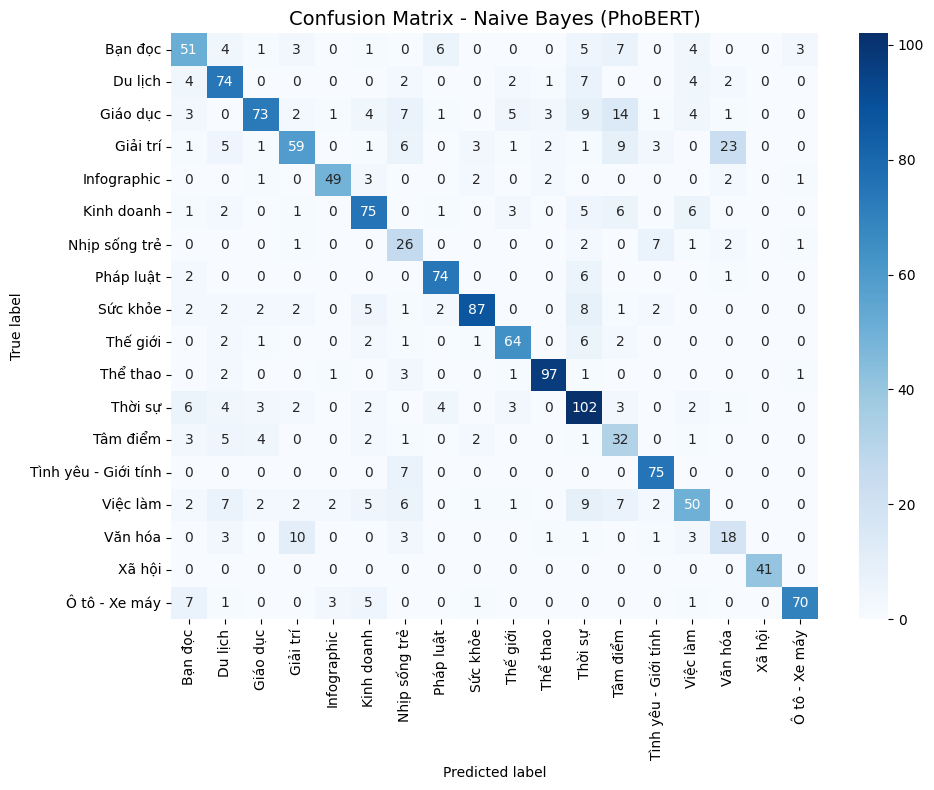


=== Naive Bayes - TF-IDF ===
Accuracy : 0.7129
Precision: 0.7206
Recall   : 0.7061
F1-score : 0.7062

Báo cáo chi tiết:
                       precision    recall  f1-score   support

             Bạn đọc       0.50      0.68      0.57        85
             Du lịch       0.65      0.62      0.63        96
            Giáo dục       0.74      0.70      0.72       128
            Giải trí       0.59      0.74      0.65       115
         Infographic       1.00      0.90      0.95        60
          Kinh doanh       0.63      0.71      0.67       100
       Nhịp sống trẻ       0.50      0.33      0.39        40
           Pháp luật       0.77      0.61      0.68        83
            Sức khỏe       0.93      0.85      0.89       114
            Thế giới       0.89      0.71      0.79        79
            Thể thao       0.94      0.88      0.91       106
             Thời sự       0.64      0.61      0.63       132
            Tâm điểm       0.53      0.90      0.67        51
Tình yêu 

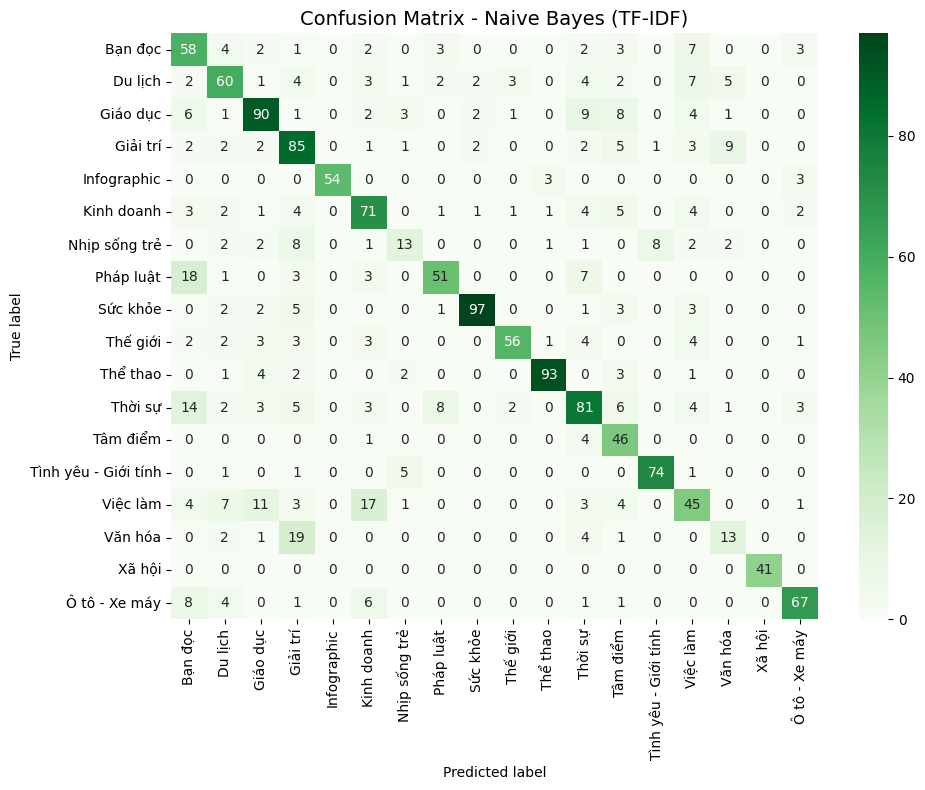

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ==========================================================
#  Naive Bayes - PhoBERT
# ==========================================================
nb_pho = GaussianNB()
nb_pho.fit(X_train_pho_scaled, y_train_pho)
y_pred_pho = nb_pho.predict(X_test_pho_scaled)

print("\n=== Naive Bayes - PhoBERT ===")
print(f"Accuracy : {accuracy_score(y_test_pho, y_pred_pho):.4f}")
print(f"Precision: {precision_score(y_test_pho, y_pred_pho, average='macro'):.4f}")
print(f"Recall   : {recall_score(y_test_pho, y_pred_pho, average='macro'):.4f}")
print(f"F1-score : {f1_score(y_test_pho, y_pred_pho, average='macro'):.4f}")
print("\nBáo cáo chi tiết:\n", classification_report(y_test_pho, y_pred_pho))

# Confusion Matrix PhoBERT
plt.figure(figsize=(10, 8))
cm_pho = confusion_matrix(y_test_pho, y_pred_pho)
sns.heatmap(
    cm_pho, annot=True, fmt="d", cmap="Blues", cbar=True,
    xticklabels=np.unique(y_test_pho), yticklabels=np.unique(y_test_pho)
)
plt.title("Confusion Matrix - Naive Bayes (PhoBERT)", fontsize=14)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()


# ==========================================================
#  Naive Bayes - TF-IDF
# ==========================================================
# Nếu là sparse → chuyển sang dense
if hasattr(X_train_tfidf_scaled, "toarray"):
    X_train_tfidf_np = X_train_tfidf_scaled.toarray()
    X_test_tfidf_np = X_test_tfidf_scaled.toarray()
else:
    X_train_tfidf_np = X_train_tfidf_scaled
    X_test_tfidf_np = X_test_tfidf_scaled

nb_tf = GaussianNB()
nb_tf.fit(X_train_tfidf_np, y_train_tfidf)
y_pred_tf = nb_tf.predict(X_test_tfidf_np)

print("\n=== Naive Bayes - TF-IDF ===")
print(f"Accuracy : {accuracy_score(y_test_tfidf, y_pred_tf):.4f}")
print(f"Precision: {precision_score(y_test_tfidf, y_pred_tf, average='macro'):.4f}")
print(f"Recall   : {recall_score(y_test_tfidf, y_pred_tf, average='macro'):.4f}")
print(f"F1-score : {f1_score(y_test_tfidf, y_pred_tf, average='macro'):.4f}")
print("\nBáo cáo chi tiết:\n", classification_report(y_test_tfidf, y_pred_tf))

# Confusion Matrix TF-IDF
plt.figure(figsize=(10, 8))
cm_tf = confusion_matrix(y_test_tfidf, y_pred_tf)
sns.heatmap(
    cm_tf, annot=True, fmt="d", cmap="Greens", cbar=True,
    xticklabels=np.unique(y_test_tfidf), yticklabels=np.unique(y_test_tfidf)
)
plt.title("Confusion Matrix - Naive Bayes (TF-IDF)", fontsize=14)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ==============================
# TF-IDF Embeddings
# ==============================
if emb_tfidf is not None and labels_tfidf is not None:
    # Train 70%, Temp 30%
    X_train_tf, X_temp_tf, y_train_tf, y_temp_tf = train_test_split(
        emb_tfidf, labels_tfidf, test_size=0.3, random_state=42, stratify=labels_tfidf
    )
    # Tách Temp thành Val 10% và Test 20%
    # 10% / 30% = 1/3  → val chiếm 1/3 Temp, test chiếm 2/3 Temp
    X_val_tf, X_test_tf, y_val_tf, y_test_tf = train_test_split(
        X_temp_tf, y_temp_tf, test_size=2/3, random_state=42, stratify=y_temp_tf
    )

    # Scale (fit trên train, transform trên val & test)
    scaler_tf = StandardScaler(with_mean=False)
    X_train_tf_scaled = scaler_tf.fit_transform(X_train_tf)
    X_val_tf_scaled   = scaler_tf.transform(X_val_tf)
    X_test_tf_scaled  = scaler_tf.transform(X_test_tf)

    print("TF-IDF split:", X_train_tf.shape, X_val_tf.shape, X_test_tf.shape)


# ==============================
# PhoBERT Embeddings
# ==============================
if emb_phobert is not None and labels_pho is not None:
    X_train_pho, X_temp_pho, y_train_pho, y_temp_pho = train_test_split(
        emb_phobert, labels_pho, test_size=0.3, random_state=42, stratify=labels_pho
    )
    X_val_pho, X_test_pho, y_val_pho, y_test_pho = train_test_split(
        X_temp_pho, y_temp_pho, test_size=2/3, random_state=42, stratify=y_temp_pho
    )

    scaler_pho = StandardScaler()
    X_train_pho_scaled = scaler_pho.fit_transform(X_train_pho)
    X_val_pho_scaled   = scaler_pho.transform(X_val_pho)
    X_test_pho_scaled  = scaler_pho.transform(X_test_pho)

    print("PhoBERT split:", X_train_pho.shape, X_val_pho.shape, X_test_pho.shape)


TF-IDF split: (5374, 3000) (768, 3000) (1536, 3000)
PhoBERT split: (5374, 768) (768, 768) (1536, 768)


### MLP


=== MLP Neural Network - PhoBERT (Validation) ===
Accuracy : 0.8529
Precision: 0.8316
Recall   : 0.8290
F1-score : 0.8294

=== MLP Neural Network - PhoBERT (Test) ===
Accuracy : 0.8438
Precision: 0.8265
Recall   : 0.8191
F1-score : 0.8205

Báo cáo chi tiết:
                       precision    recall  f1-score   support

             Bạn đọc       0.70      0.69      0.70        85
             Du lịch       0.81      0.91      0.85        96
            Giáo dục       0.85      0.91      0.88       128
            Giải trí       0.75      0.77      0.76       115
         Infographic       0.97      1.00      0.98        59
          Kinh doanh       0.82      0.82      0.82       101
       Nhịp sống trẻ       0.71      0.64      0.68        39
           Pháp luật       0.93      0.89      0.91        83
            Sức khỏe       0.92      0.96      0.94       114
            Thế giới       0.90      0.93      0.91        80
            Thể thao       0.99      0.94      0.97      

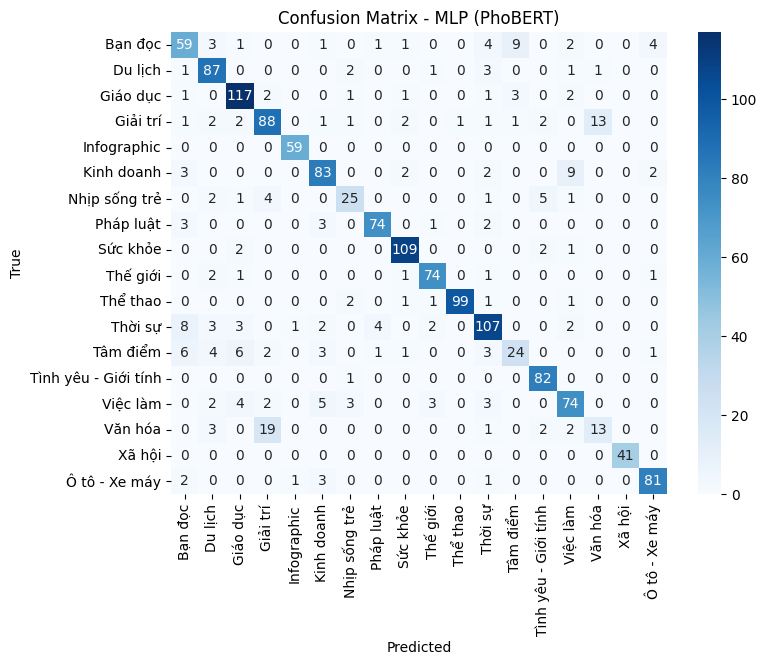


=== MLP Neural Network - TF-IDF (Validation) ===
Accuracy : 0.8802
Precision: 0.8804
Recall   : 0.8731
F1-score : 0.8760

=== MLP Neural Network - TF-IDF (Test) ===
Accuracy : 0.8802
Precision: 0.8803
Recall   : 0.8659
F1-score : 0.8702

Báo cáo chi tiết:
                       precision    recall  f1-score   support

             Bạn đọc       0.78      0.75      0.77        85
             Du lịch       0.84      0.89      0.86        96
            Giáo dục       0.95      0.95      0.95       128
            Giải trí       0.77      0.88      0.82       115
         Infographic       0.97      0.98      0.97        59
          Kinh doanh       0.84      0.84      0.84       101
       Nhịp sống trẻ       0.69      0.64      0.67        39
           Pháp luật       0.90      0.90      0.90        83
            Sức khỏe       0.93      0.96      0.94       114
            Thế giới       0.94      0.90      0.92        80
            Thể thao       0.97      0.96      0.97       1

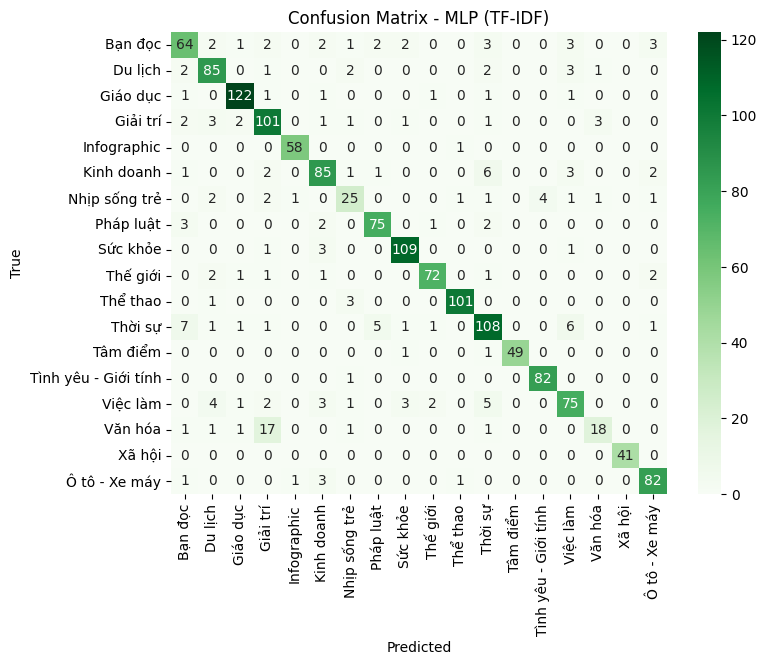

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ==========================================================
#  MLP Neural Network - PhoBERT
# ==========================================================
mlp_pho = MLPClassifier(
    hidden_layer_sizes=(512, 256),
    activation='relu',
    max_iter=300,
    random_state=42
)

mlp_pho.fit(X_train_pho_scaled, y_train_pho)

# Validation
y_val_pred_pho = mlp_pho.predict(X_val_pho_scaled)
print("\n=== MLP Neural Network - PhoBERT (Validation) ===")
print(f"Accuracy : {accuracy_score(y_val_pho, y_val_pred_pho):.4f}")
print(f"Precision: {precision_score(y_val_pho, y_val_pred_pho, average='macro'):.4f}")
print(f"Recall   : {recall_score(y_val_pho, y_val_pred_pho, average='macro'):.4f}")
print(f"F1-score : {f1_score(y_val_pho, y_val_pred_pho, average='macro'):.4f}")

# Test
y_test_pred_pho = mlp_pho.predict(X_test_pho_scaled)
print("\n=== MLP Neural Network - PhoBERT (Test) ===")
print(f"Accuracy : {accuracy_score(y_test_pho, y_test_pred_pho):.4f}")
print(f"Precision: {precision_score(y_test_pho, y_test_pred_pho, average='macro'):.4f}")
print(f"Recall   : {recall_score(y_test_pho, y_test_pred_pho, average='macro'):.4f}")
print(f"F1-score : {f1_score(y_test_pho, y_test_pred_pho, average='macro'):.4f}")
print("\nBáo cáo chi tiết:\n", classification_report(y_test_pho, y_test_pred_pho))

plt.figure(figsize=(8,6))
cm_pho = confusion_matrix(y_test_pho, y_test_pred_pho)
sns.heatmap(cm_pho, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test_pho),
            yticklabels=np.unique(y_test_pho))
plt.title("Confusion Matrix - MLP (PhoBERT)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# ==========================================================
#  MLP Neural Network - TF-IDF
# ==========================================================
mlp_tf = MLPClassifier(
    hidden_layer_sizes=(512, 256),
    activation='relu',
    max_iter=300,
    random_state=42
)

mlp_tf.fit(X_train_tf_scaled, y_train_tf)

# Validation
y_val_pred_tf = mlp_tf.predict(X_val_tf_scaled)
print("\n=== MLP Neural Network - TF-IDF (Validation) ===")
print(f"Accuracy : {accuracy_score(y_val_tf, y_val_pred_tf):.4f}")
print(f"Precision: {precision_score(y_val_tf, y_val_pred_tf, average='macro'):.4f}")
print(f"Recall   : {recall_score(y_val_tf, y_val_pred_tf, average='macro'):.4f}")
print(f"F1-score : {f1_score(y_val_tf, y_val_pred_tf, average='macro'):.4f}")

# Test
y_test_pred_tf = mlp_tf.predict(X_test_tf_scaled)
print("\n=== MLP Neural Network - TF-IDF (Test) ===")
print(f"Accuracy : {accuracy_score(y_test_tf, y_test_pred_tf):.4f}")
print(f"Precision: {precision_score(y_test_tf, y_test_pred_tf, average='macro'):.4f}")
print(f"Recall   : {recall_score(y_test_tf, y_test_pred_tf, average='macro'):.4f}")
print(f"F1-score : {f1_score(y_test_tf, y_test_pred_tf, average='macro'):.4f}")
print("\nBáo cáo chi tiết:\n", classification_report(y_test_tf, y_test_pred_tf))

plt.figure(figsize=(8,6))
cm_tf = confusion_matrix(y_test_tf, y_test_pred_tf)
sns.heatmap(cm_tf, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.unique(y_test_tf),
            yticklabels=np.unique(y_test_tf))
plt.title("Confusion Matrix - MLP (TF-IDF)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### Đánh giá


In [8]:
import pandas as pd

# ===============================
# BẢNG KẾT QUẢ TỔNG HỢP
# ===============================
results = [
    # Logistic Regression
    {"Model": "Logistic Regression", "Embedding": "TF-IDF", "Accuracy": 0.8691, "Precision": 0.8620, "Recall": 0.8658, "F1": 0.8631},
    {"Model": "Logistic Regression", "Embedding": "PhoBERT", "Accuracy": 0.8086, "Precision": 0.7923, "Recall": 0.7977, "F1": 0.7941},

    # Random Forest
    {"Model": "Random Forest", "Embedding": "TF-IDF", "Accuracy": 0.8424, "Precision": 0.8682, "Recall": 0.8208, "F1": 0.8270},
    {"Model": "Random Forest", "Embedding": "PhoBERT", "Accuracy": 0.7878, "Precision": 0.8265, "Recall": 0.7398, "F1": 0.7363},

    # XGBoost
    {"Model": "XGBoost", "Embedding": "TF-IDF", "Accuracy": 0.8659, "Precision": 0.8699, "Recall": 0.8550, "F1": 0.8587},
    {"Model": "XGBoost", "Embedding": "PhoBERT", "Accuracy": 0.8034, "Precision": 0.7921, "Recall": 0.7670, "F1": 0.7683},

    # Naive Bayes
    {"Model": "Naive Bayes", "Embedding": "TF-IDF", "Accuracy": 0.7129, "Precision": 0.7206, "Recall": 0.7061, "F1": 0.7062},
    {"Model": "Naive Bayes", "Embedding": "PhoBERT", "Accuracy": 0.7272, "Precision": 0.7265, "Recall": 0.7296, "F1": 0.7206},

    # MLP Neural Network
    {"Model": "MLP Neural Network", "Embedding": "TF-IDF (Validation)", "Accuracy": 0.8802, "Precision": 0.8804, "Recall": 0.8731, "F1": 0.8760},
    {"Model": "MLP Neural Network", "Embedding": "TF-IDF (Test)",       "Accuracy": 0.8802, "Precision": 0.8803, "Recall": 0.8659, "F1": 0.8702},

    {"Model": "MLP Neural Network", "Embedding": "PhoBERT (Validation)", "Accuracy": 0.8529, "Precision": 0.8316, "Recall": 0.8290, "F1": 0.8294},
    {"Model": "MLP Neural Network", "Embedding": "PhoBERT (Test)",       "Accuracy": 0.8438, "Precision": 0.8265, "Recall": 0.8191, "F1": 0.8205},

]

df_results = pd.DataFrame(results)
print("=== BẢNG TỔNG HỢP HIỆU SUẤT THEO MÔ HÌNH ===")
print(df_results)


=== BẢNG TỔNG HỢP HIỆU SUẤT THEO MÔ HÌNH ===
                  Model             Embedding  Accuracy  Precision  Recall  \
0   Logistic Regression                TF-IDF    0.8691     0.8620  0.8658   
1   Logistic Regression               PhoBERT    0.8086     0.7923  0.7977   
2         Random Forest                TF-IDF    0.8424     0.8682  0.8208   
3         Random Forest               PhoBERT    0.7878     0.8265  0.7398   
4               XGBoost                TF-IDF    0.8659     0.8699  0.8550   
5               XGBoost               PhoBERT    0.8034     0.7921  0.7670   
6           Naive Bayes                TF-IDF    0.7129     0.7206  0.7061   
7           Naive Bayes               PhoBERT    0.7272     0.7265  0.7296   
8    MLP Neural Network   TF-IDF (Validation)    0.8802     0.8804  0.8731   
9    MLP Neural Network         TF-IDF (Test)    0.8802     0.8803  0.8659   
10   MLP Neural Network  PhoBERT (Validation)    0.8529     0.8316  0.8290   
11   MLP Neural Net

In [9]:
for model in df_results["Model"].unique():
    print(f"\n===== {model} =====")
    display(df_results[df_results["Model"] == model])



===== Logistic Regression =====


Model Embedding  Accuracy  Precision  Recall      F1
0  Logistic Regression    TF-IDF    0.8691     0.8620  0.8658  0.8631
1  Logistic Regression   PhoBERT    0.8086     0.7923  0.7977  0.7941


===== Random Forest =====


Model Embedding  Accuracy  Precision  Recall      F1
2  Random Forest    TF-IDF    0.8424     0.8682  0.8208  0.8270
3  Random Forest   PhoBERT    0.7878     0.8265  0.7398  0.7363


===== XGBoost =====


Model Embedding  Accuracy  Precision  Recall      F1
4  XGBoost    TF-IDF    0.8659     0.8699   0.855  0.8587
5  XGBoost   PhoBERT    0.8034     0.7921   0.767  0.7683


===== Naive Bayes =====


Model Embedding  Accuracy  Precision  Recall      F1
6  Naive Bayes    TF-IDF    0.7129     0.7206  0.7061  0.7062
7  Naive Bayes   PhoBERT    0.7272     0.7265  0.7296  0.7206


===== MLP Neural Network =====


Model             Embedding  Accuracy  Precision  Recall  \
8   MLP Neural Network   TF-IDF (Validation)    0.8802     0.8804  0.8731   
9   MLP Neural Network         TF-IDF (Test)    0.8802     0.8803  0.8659   
10  MLP Neural Network  PhoBERT (Validation)    0.8529     0.8316  0.8290   
11  MLP Neural Network        PhoBERT (Test)    0.8438     0.8265  0.8191   

        F1  
8   0.8760  
9   0.8702  
10  0.8294  
11  0.8205

/tmp/ipython-input-1895752643.py:8: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(


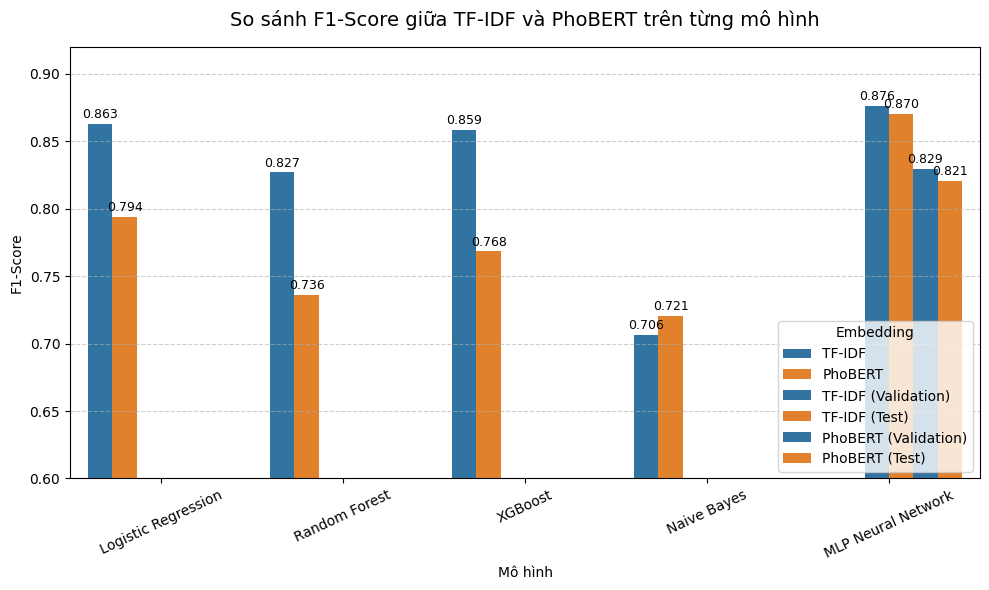

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sắp xếp lại thứ tự mô hình cho đẹp
order = ["Logistic Regression", "Random Forest", "XGBoost", "Naive Bayes", "MLP Neural Network"]

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=df_results,
    x="Model", y="F1",
    hue="Embedding",
    order=order,
    palette=["#1f77b4", "#ff7f0e"]
)

# Tiêu đề & nhãn
plt.title("So sánh F1-Score giữa TF-IDF và PhoBERT trên từng mô hình", fontsize=14, pad=15)
plt.ylabel("F1-Score")
plt.xlabel("Mô hình")
plt.ylim(0.6, 0.92)
plt.xticks(rotation=25)
plt.legend(title="Embedding", loc="lower right")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# === Hiển thị giá trị trên từng cột ===
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", label_type="edge", fontsize=9, padding=2, color="black")

plt.tight_layout()
plt.show()
